# Customer segmentation in a wholesale business

**Executive Summary** <br>
In this notebook, a descriptive analysis of the sales of a business will be made, applying cohort analysis and RFM (recency, frecuency, monetary)

# **About Dataset**<br>

a CEO of an online commerce company needs to know how well or poorly sales are going in the company.

# **About this file** <br>
This data set groups 25,900 sales from a wholesale business. Each row represents an invoice with the data detailed in the columns.

# **Data Dictionary** <br>
**N° de factura**
A number assigned exclusively to each transaction. If it starts with "c", it indicates an override. <br>
**Fecha de factura**
Date and time of the invoice, the day and time the transaction was generated. <br>
**ID Cliente**
Number of clients. An integral 5-digit number uniquely assigned to each customer.<br>
**País**
Country Name The name of the country where each client resides. <br>
**Cantidad**
The quantities of each product (item) per transaction.<br>
**Monto**
Invoice amount in pounds sterling.<br>



# **Understading the dataset**

In [355]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt #Library to work with variables of date and time

In [356]:
#Display file
path = "https://raw.githubusercontent.com/edofarias/Customer-segmentation-in-ecommerce/main/ventas-por-factura.csv"
df = pd.read_csv(path, sep=",")
print (df.shape)
df.head()

(25953, 6)


,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,3/30/2021 16:14:00,15528.0,United Kingdom,123,"229,33"
1,575767,11/11/2021 11:11:00,17348.0,United Kingdom,163,"209,73"
2,C570727,10/12/2021 11:32:00,12471.0,Germany,-1,"-1,45"
3,549106,4/6/2021 12:08:00,17045.0,United Kingdom,1,"39,95"
4,573112,10/27/2021 15:33:00,16416.0,United Kingdom,357,"344,83"


In [357]:
#Check type var
df.dtypes

N° de factura        object
Fecha de factura     object
ID Cliente          float64
País                 object
Cantidad              int64
Monto                object
dtype: object

it can be the following features about the type of var <br>
"N de factura" is a categorical nominal variable <br>
"Fecha de factura" is date variable plus a time variable so it must be split and changed. both of them numerical variable <br>
"Id client" is a categorical nominal variable <br>
"Pais" is a categorical nominal variable <br>
"Cantidad" a numerical discret variable <br>
"Monto" a numerical continuous variable

In [358]:
#We transform the variables according their nature
df['Fecha de factura'] = pd.to_datetime(df['Fecha de factura'])
df["ID Cliente"] = df["ID Cliente"].replace(np.nan, "Unspecified")
df['ID Cliente'] = df['ID Cliente'].astype(str)
df["Monto"]=df["Monto"].str.replace(',','.').astype(float)


In [359]:
df.head()

,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
0,548370,2021-03-30 16:14:00,15528.0,United Kingdom,123,229.33
1,575767,2021-11-11 11:11:00,17348.0,United Kingdom,163,209.73
2,C570727,2021-10-12 11:32:00,12471.0,Germany,-1,-1.45
3,549106,2021-04-06 12:08:00,17045.0,United Kingdom,1,39.95
4,573112,2021-10-27 15:33:00,16416.0,United Kingdom,357,344.83


In [360]:
#Now we check the main feutures of the data
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  


,N° de factura,Fecha de factura,ID Cliente,País,Cantidad,Monto
count,25953,25953,25953,25953,25953.000000,25953.000000
unique,25900,23260,4373,38,NaN,NaN
top,550333,2021-05-10 15:05:00,Unspecified,United Kingdom,NaN,NaN
freq,2,6,3724,23542,NaN,NaN
first,NaN,2020-12-01 08:26:00,NaN,NaN,NaN,NaN
last,NaN,2021-12-09 12:50:00,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,199.474049,375.657552
std,NaN,NaN,NaN,NaN,1107.075809,2009.042459
min,NaN,NaN,NaN,NaN,-80995.000000,-168469.600000
25%,NaN,NaN,NaN,NaN,6.000000,11.550000


It can be observed that there are 25900 unique bills which take place from  december 01, 2020 to december 09, 2021. Furtehermore, all of these bills are distributed into 4373 clients in 38 countries.

In [361]:
#Now we check if there are empty rows
df.isna().sum(axis = 0)

N° de factura       0
Fecha de factura    0
ID Cliente          0
País                0
Cantidad            0
Monto               0
dtype: int64

In [362]:
df.count() # there is no empty rows

N° de factura       25953
Fecha de factura    25953
ID Cliente          25953
País                25953
Cantidad            25953
Monto               25953
dtype: int64

# Creating new columns to make the descriptive analysis

In [363]:
#Now we split Fecha de factura into date and time
df['Date'] = pd.to_datetime(df['Fecha de factura']).dt.date
df['Time'] = pd.to_datetime(df['Fecha de factura']).dt.time
del df['Fecha de factura']

In [364]:
df.head() 

,N° de factura,ID Cliente,País,Cantidad,Monto,Date,Time
0,548370,15528.0,United Kingdom,123,229.33,2021-03-30,16:14:00
1,575767,17348.0,United Kingdom,163,209.73,2021-11-11,11:11:00
2,C570727,12471.0,Germany,-1,-1.45,2021-10-12,11:32:00
3,549106,17045.0,United Kingdom,1,39.95,2021-04-06,12:08:00
4,573112,16416.0,United Kingdom,357,344.83,2021-10-27,15:33:00


In [365]:
#Now we create a column that shows where is a annulment
df['annulment'] = df['N° de factura'].str[:1]
aux = [] #auxiliar column where 1 is canceled
for row in df['annulment']:
        if row == 'C'  :    aux.append(1)
        else :  aux.append(0)
df['annulment'] = aux
df.head()

,N° de factura,ID Cliente,País,Cantidad,Monto,Date,Time,annulment
0,548370,15528.0,United Kingdom,123,229.33,2021-03-30,16:14:00,0
1,575767,17348.0,United Kingdom,163,209.73,2021-11-11,11:11:00,0
2,C570727,12471.0,Germany,-1,-1.45,2021-10-12,11:32:00,1
3,549106,17045.0,United Kingdom,1,39.95,2021-04-06,12:08:00,0
4,573112,16416.0,United Kingdom,357,344.83,2021-10-27,15:33:00,0


Now we analize how much revenue the company has by country, which are the main clients and that date is the most profitable

In [366]:
#Now we create a column that shows where is a annulment
aux = [] #auxiliar column where 1 is canceled
for row in df['País']:
        if row == 'United Kingdom'  :    aux.append("UK")
        else :  aux.append("Rest of the world")
df['is UK'] = aux
df.head()

,N° de factura,ID Cliente,País,Cantidad,Monto,Date,Time,annulment,is UK
0,548370,15528.0,United Kingdom,123,229.33,2021-03-30,16:14:00,0,UK
1,575767,17348.0,United Kingdom,163,209.73,2021-11-11,11:11:00,0,UK
2,C570727,12471.0,Germany,-1,-1.45,2021-10-12,11:32:00,1,Rest of the world
3,549106,17045.0,United Kingdom,1,39.95,2021-04-06,12:08:00,0,UK
4,573112,16416.0,United Kingdom,357,344.83,2021-10-27,15:33:00,0,UK


In [367]:
df['month'] = pd.DatetimeIndex(df['Date']).month.astype(str)
aux=[]
for row in df['month']:
        if row == "1"  :    aux.append("01")
        elif row == "2"  :    aux.append("02")
        elif row == "3"  :    aux.append("03")
        elif row == "4"  :    aux.append("04")
        elif row == "5"  :    aux.append("05")
        elif row == "6"  :    aux.append("06")
        elif row == "7"  :    aux.append("07")
        elif row == "8"  :    aux.append("08")
        elif row == "9"  :    aux.append("09")
        else :  aux.append(row)
df['month'] = aux
df['year'] = pd.DatetimeIndex(df['Date']).year.astype(str)
df["year_month"] = df['year'] + "-" + df['month']
df.head()

,N° de factura,ID Cliente,País,Cantidad,Monto,Date,Time,annulment,is UK,month,year,year_month
0,548370,15528.0,United Kingdom,123,229.33,2021-03-30,16:14:00,0,UK,03,2021,2021-03
1,575767,17348.0,United Kingdom,163,209.73,2021-11-11,11:11:00,0,UK,11,2021,2021-11
2,C570727,12471.0,Germany,-1,-1.45,2021-10-12,11:32:00,1,Rest of the world,10,2021,2021-10
3,549106,17045.0,United Kingdom,1,39.95,2021-04-06,12:08:00,0,UK,04,2021,2021-04
4,573112,16416.0,United Kingdom,357,344.83,2021-10-27,15:33:00,0,UK,10,2021,2021-10


In [368]:
#Now we show a column without annulment Ammount
aux=[]
for row in df['Monto']:
        if row < 0  :    aux.append(0)
        else :  aux.append(row)
df['Amount without annulment'] = aux
df.head()

,N° de factura,ID Cliente,País,Cantidad,Monto,Date,Time,annulment,is UK,month,year,year_month,Amount without annulment
0,548370,15528.0,United Kingdom,123,229.33,2021-03-30,16:14:00,0,UK,03,2021,2021-03,229.33
1,575767,17348.0,United Kingdom,163,209.73,2021-11-11,11:11:00,0,UK,11,2021,2021-11,209.73
2,C570727,12471.0,Germany,-1,-1.45,2021-10-12,11:32:00,1,Rest of the world,10,2021,2021-10,0.00
3,549106,17045.0,United Kingdom,1,39.95,2021-04-06,12:08:00,0,UK,04,2021,2021-04,39.95
4,573112,16416.0,United Kingdom,357,344.83,2021-10-27,15:33:00,0,UK,10,2021,2021-10,344.83


# Check out what countries are involved

In [369]:
df.groupby(['País']).agg({'Monto': 'sum', 'ID Cliente': 'nunique'}).sort_values(by=['Monto'], ascending=False)

,Monto,ID Cliente
País,,
United Kingdom,8188726.83,3951
Netherlands,284661.54,9
EIRE,264053.12,4
Germany,221698.21,95
France,197403.90,88
Australia,137077.27,9
Switzerland,56385.35,22
Spain,54774.58,31
Belgium,40910.96,25


It can be appreciated that the label "unspecified" is negligible in terms of profitability to the whole company, and it does not add value into the analysis of segregation. Therefore it can be eliminated. Furthermore, we change some names for a better understanding.
EIRE is written in irish wich means Ireland
RSA is the abreviation of South Africa

In [370]:
#Delete rows related to unspecified countries
df=df[(df['País']!="Unspecified")]


In [371]:
#Now we replace the new names
df['País'] = df['País'].replace(['EIRE', 'RSA'], ['Ireland', 'South Africa'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [372]:
#Now it is shown the dataframe with the changes made
df.groupby(['País']).agg({'Monto': 'sum', 'ID Cliente': 'nunique'}).sort_values(by=['Monto'], ascending=False)

,Monto,ID Cliente
País,,
United Kingdom,8188726.83,3951
Netherlands,284661.54,9
Ireland,264053.12,4
Germany,221698.21,95
France,197403.90,88
Australia,137077.27,9
Switzerland,56385.35,22
Spain,54774.58,31
Belgium,40910.96,25


# Cohort Analysis between UK and the rest of the world and RFM method (recency, frecuency, monetary)

In [373]:
#revenue by country
df_country = df.groupby(['is UK']).agg({'Monto': 'sum', 'ID Cliente': 'nunique'})
df_country.sort_values(by=['Monto'], ascending=False).head(20)


,Monto,ID Cliente
is UK,,
UK,8188726.83,3951
Rest of the world,1555963.83,419


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f49cb7eab90>,
      dtype=object)

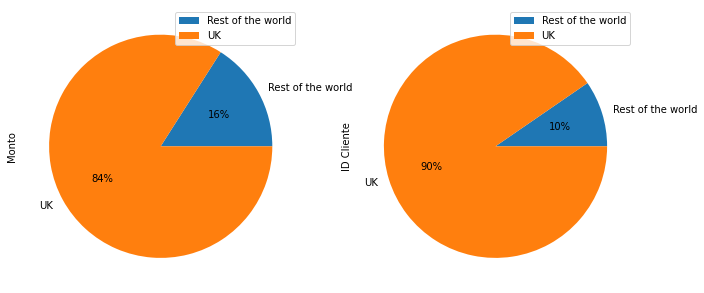

In [374]:
df_country.plot.pie(subplots=True, figsize=(11, 6),autopct='%1.0f%%')

It can be observed that the only 16% of revenue comes from outside UK and it includes only 10% of the client. So now it will be seen in deep this portion of the graph pie. <br><br>
**OUTSIDE UK**

In [375]:
#revenue by month outside UK
df_month_r = df[(df['is UK']=="Rest of the world")].groupby(['year_month']).agg({'Monto': 'sum', 'Amount without annulment': 'sum' })
df_month_r.sort_values(by=['year_month'], ascending=True)

,Monto,Amount without annulment
year_month,,
2020-12,72214.40,75477.16
2021-01,125691.96,130074.58
2021-02,89814.74,93603.94
2021-03,123559.69,131409.08
2021-04,50653.98,60991.76
2021-05,125817.78,130165.79
2021-06,136458.99,142043.45
2021-07,114394.86,115800.94
2021-08,143018.98,150559.87


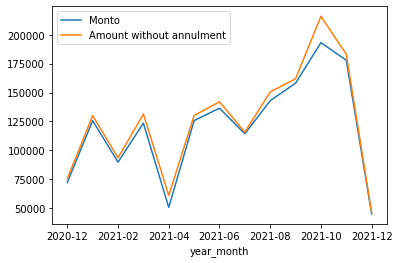

In [376]:
df_month_r.plot.line()

In [377]:
#revenue by country outside UK
df_country = df[(df['is UK']=="Rest of the world")].groupby(['País']).agg({'Monto': 'sum'})
df_country = df_country.sort_values(by=['Monto'], ascending=False)
df_country

,Monto
País,
Netherlands,284661.54
Ireland,264053.12
Germany,221698.21
France,197403.90
Australia,137077.27
Switzerland,56385.35
Spain,54774.58
Belgium,40910.96
Sweden,36595.91


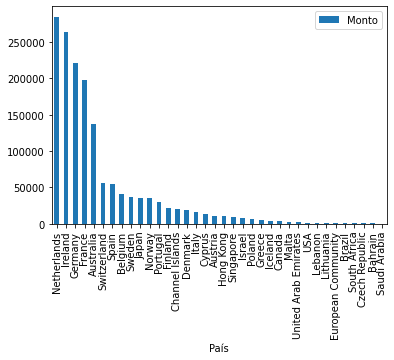

In [378]:
df_country.plot.bar()

In [379]:
#revenue by client outside UK  but as we want to see the behave by client we eliminate unspecified client
df_client_r = df[(df['is UK']=="Rest of the world") & (df['ID Cliente']!='Unspecified')].groupby(['ID Cliente']).agg({'Monto': 'sum', 'País': 'first'})
df_client_r.sort_values(by=['Monto'], ascending=False).head(10)

,Monto,País
ID Cliente,,
14646.0,279489.02,Netherlands
14911.0,133348.92,Ireland
12415.0,123725.45,Australia
14156.0,113384.14,Ireland
17404.0,30300.82,Sweden
12753.0,21024.01,Japan
12731.0,18793.41,France
12471.0,18740.92,Germany
12678.0,17588.26,France


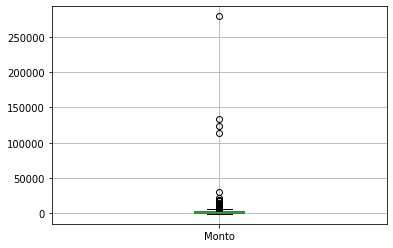

In [380]:
df_client_r.boxplot()

Now we analize what happens inside UK

In [381]:
#revenue by month in UK
df_month_uk = df[(df['is UK']=="UK")].groupby(['year_month']).agg({'Monto': 'sum', 'Amount without annulment': 'sum' })
df_month_uk.sort_values(by=['year_month'], ascending=True)

,Monto,Amount without annulment
year_month,,
2020-12,676742.62,748268.98
2021-01,434308.30,561289.98
2021-02,408247.91,430027.95
2021-03,559707.39,586230.28
2021-04,442254.04,476517.76
2021-05,596459.86,639314.36
2021-06,554478.35,619510.67
2021-07,565479.84,601994.84
2021-08,539130.50,608047.48


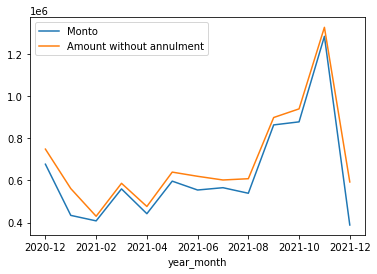

In [382]:
df_month_uk.plot.line()

In [383]:
#revenue by client in UK wihtout considering unspecified clients
df_client_uk = df[(df['is UK']=="UK") & (df['ID Cliente']!='Unspecified')].groupby(['ID Cliente']).agg({'Monto': 'sum'})
df_client_uk.sort_values(by=['Monto'], ascending=False).head(10)

,Monto
ID Cliente,
18102.0,256438.49
17450.0,187482.17
17511.0,88125.38
16684.0,65892.08
13694.0,62653.10
15311.0,59419.34
13089.0,57385.88
14096.0,57120.91
15061.0,54228.74


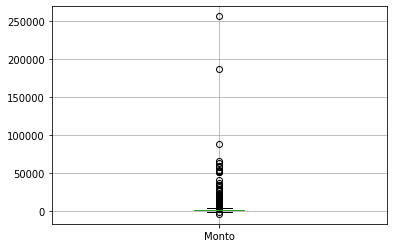

In [384]:
df_client_uk.boxplot()

**Loyalty of clients**

In [385]:
df_loyalty_r = pd.DataFrame(df[(df['is UK']=="Rest of the world") & (df['ID Cliente']!='Unspecified')].groupby(['ID Cliente', 'year_month']).agg({'Monto': 'sum'}).unstack().reset_index())

df_loyalty_r.shape

(418, 14)

In [386]:
#We create auxiliar variables to add a column which says hoy many month have bought each client
var1=[]
for row in df_loyalty_r['Monto']['2020-12']:
        if row > 0  :    var1.append(1)
        else :  var1.append(0)
var2=[]
for row in df_loyalty_r['Monto']['2021-01']:
        if row > 0  :    var2.append(1)
        else :  var2.append(0)
var3=[]
for row in df_loyalty_r['Monto']['2021-02']:
        if row > 0  :    var3.append(1)
        else :  var3.append(0)
var4=[]
for row in df_loyalty_r['Monto']['2021-03']:
        if row > 0  :    var4.append(1)
        else :  var4.append(0)
var5=[]
for row in df_loyalty_r['Monto']['2021-04']:
        if row > 0  :    var5.append(1)
        else :  var5.append(0)
var6=[]
for row in df_loyalty_r['Monto']['2021-05']:
        if row > 0  :    var6.append(1)
        else :  var6.append(0)
var7=[]
for row in df_loyalty_r['Monto']['2021-06']:
        if row > 0  :    var7.append(1)
        else :  var7.append(0)
var8=[]
for row in df_loyalty_r['Monto']['2021-07']:
        if row > 0  :    var8.append(1)
        else :  var8.append(0)
var9=[]
for row in df_loyalty_r['Monto']['2021-08']:
        if row > 0  :    var9.append(1)
        else :  var9.append(0)
var10=[]
for row in df_loyalty_r['Monto']['2021-09']:
        if row > 0  :    var10.append(1)
        else :  var10.append(0)
var11=[]
for row in df_loyalty_r['Monto']['2021-10']:
        if row > 0  :    var11.append(1)
        else :  var11.append(0)
var12=[]
for row in df_loyalty_r['Monto']['2021-11']:
        if row > 0  :    var12.append(1)
        else :  var12.append(0)
var13=[]
for row in df_loyalty_r['Monto']['2021-12']:
        if row > 0  :    var13.append(1)
        else :  var13.append(0)


In [387]:
#Now we create the column
df_loyalty_r['Loyalty'] = (np.array(var1) + np.array(var2)+ np.array(var3)+ np.array(var4)+ np.array(var5)+ np.array(var6)+ np.array(var7)+ np.array(var8)+ np.array(var9)
+ np.array(var10)+ np.array(var11)+ np.array(var12)+ np.array(var13))
df_loyalty_r.head()

ID Cliente   Monto                                                  \
year_month            2020-12 2021-01 2021-02 2021-03 2021-04 2021-05 2021-06   
0             12347.0  711.79  475.39     NaN     NaN  636.25     NaN  382.52   
1             12348.0  892.80  227.44     NaN     NaN  367.00     NaN     NaN   
2             12349.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3             12350.0     NaN     NaN   334.4     NaN     NaN     NaN     NaN   
4             12352.0     NaN     NaN   296.5  304.68     NaN     NaN     NaN   

                                                             Loyalty  
year_month 2021-07 2021-08 2021-09  2021-10  2021-11 2021-12          
0              NaN  584.91     NaN  1294.32      NaN  224.82       7  
1              NaN     NaN   310.0      NaN      NaN     NaN       4  
2              NaN     NaN     NaN      NaN  1757.55     NaN       1  
3              NaN     NaN     NaN      NaN      NaN     NaN       1  
4              NaN     NaN   632.5      NaN   311.73     NaN       4

The new column loyalty shows how many time there was a transaction. The number goes from 0 to 13 since the information displayd is 13 month.

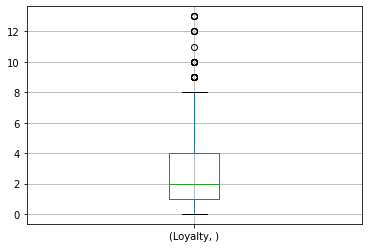

In [388]:
df_loyalty_r[['Loyalty']].boxplot()

From the boxplot can be observed that the median is arounr 2 transaction in the month and just a couple of client have a high loyalty, buying month by month.

In [389]:
#Loyalty into UK

df_loyalty_uk = pd.DataFrame(df[(df['is UK']=="UK") & (df['ID Cliente']!='Unspecified')].groupby(['ID Cliente', 'year_month']).agg({'Monto': 'sum'}).unstack().reset_index())

df_loyalty_uk.shape

(3950, 14)

In [390]:
#We create auxiliar variables to add a column which says hoy many month have bought each client
var1=[]
for row in df_loyalty_uk['Monto']['2020-12']:
        if row > 0  :    var1.append(1)
        else :  var1.append(0)
var2=[]
for row in df_loyalty_uk['Monto']['2021-01']:
        if row > 0  :    var2.append(1)
        else :  var2.append(0)
var3=[]
for row in df_loyalty_uk['Monto']['2021-02']:
        if row > 0  :    var3.append(1)
        else :  var3.append(0)
var4=[]
for row in df_loyalty_uk['Monto']['2021-03']:
        if row > 0  :    var4.append(1)
        else :  var4.append(0)
var5=[]
for row in df_loyalty_uk['Monto']['2021-04']:
        if row > 0  :    var5.append(1)
        else :  var5.append(0)
var6=[]
for row in df_loyalty_uk['Monto']['2021-05']:
        if row > 0  :    var6.append(1)
        else :  var6.append(0)
var7=[]
for row in df_loyalty_uk['Monto']['2021-06']:
        if row > 0  :    var7.append(1)
        else :  var7.append(0)
var8=[]
for row in df_loyalty_uk['Monto']['2021-07']:
        if row > 0  :    var8.append(1)
        else :  var8.append(0)
var9=[]
for row in df_loyalty_uk['Monto']['2021-08']:
        if row > 0  :    var9.append(1)
        else :  var9.append(0)
var10=[]
for row in df_loyalty_uk['Monto']['2021-09']:
        if row > 0  :    var10.append(1)
        else :  var10.append(0)
var11=[]
for row in df_loyalty_uk['Monto']['2021-10']:
        if row > 0  :    var11.append(1)
        else :  var11.append(0)
var12=[]
for row in df_loyalty_uk['Monto']['2021-11']:
        if row > 0  :    var12.append(1)
        else :  var12.append(0)
var13=[]
for row in df_loyalty_uk['Monto']['2021-12']:
        if row > 0  :    var13.append(1)
        else :  var13.append(0)

In [391]:
#Now we create the column
df_loyalty_uk['Loyalty'] = (np.array(var1) + np.array(var2)+ np.array(var3)+ np.array(var4)+ np.array(var5)+ np.array(var6)+ np.array(var7)+ np.array(var8)+ np.array(var9)
+ np.array(var10)+ np.array(var11)+ np.array(var12)+ np.array(var13))
df_loyalty_uk.head()

ID Cliente    Monto                                             \
year_month             2020-12 2021-01 2021-02  2021-03  2021-04  2021-05   
0             12346.0      NaN    0.00     NaN      NaN      NaN      NaN   
1             12747.0   706.27  303.04     NaN   310.78      NaN   771.31   
2             12748.0  4177.68  418.77  389.64  1011.94  1100.37  2224.42   
3             12749.0      NaN     NaN     NaN      NaN      NaN   782.10   
4             12820.0      NaN  170.46     NaN      NaN      NaN      NaN   

                                                                           \
year_month  2021-06  2021-07  2021-08  2021-09  2021-10  2021-11  2021-12   
0               NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1            376.30      NaN   301.70      NaN   675.38   312.73   438.50   
2           2006.26  1113.27   659.42  4218.65  1385.84  9295.57  1070.27   
3               NaN      NaN  1750.45      NaN      NaN   572.59   763.06   
4               NaN      NaN      NaN   217.77   343.76      NaN   210.35   

           Loyalty  
year_month          
0                0  
1                9  
2               13  
3                4  
4                4

The new column loyalty shows how many time there was a transaction. The number goes from 0 to 13 since the information displayd is 13 month.

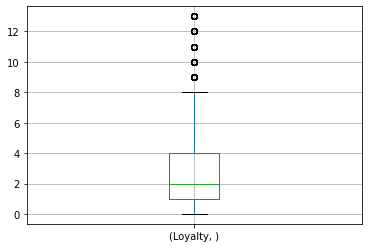

In [392]:
df_loyalty_uk[['Loyalty']].boxplot()

In [393]:
#df_loyalty_r[['Loyalty']].plot.bar()

In [394]:
#df_loyalty_uk[['Loyalty']].plot.bar()

**Conclusions** <br>

The traffic of sellings its highly superior in UK than in the rest of the world.<br>
But to make a desicion if still worth to sell outside UK, it is necessary to know how much is spent  extra to each country. In other words what is the marginal cost to sell outside UK.<br>

On other hand, loyalty is quite similar between UK and rest of the world, which means that a marketing strategie could work in general for both of them.<br>

**¿How to continue?**<br>
Collecting information about cost to sell for each country.<br>
Collegting data about  april 2021 <br>
In the analysis it was not considered that each client did not start at the first month. Therefore, this could change the results of loyalty. <br>
Rename variables for a better understanding <br>
Improve algorithm to use less resources <br>
Add a column to analyse better recency, with how many month have passed from the last interaction.

